<a href="https://colab.research.google.com/github/yoonkim97/pytorch-resnet-mnist/blob/master/MNISTResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from torchvision.models.resnet import ResNet, BasicBlock
from torchvision.datasets import MNIST
from tqdm.autonotebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, auc
import inspect
import time
from torch import nn, optim
import torch
from torchvision.transforms import Compose, ToTensor, Normalize, Resize
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class MnistResNet(ResNet):
  def __init__(self):
    super(MnistResNet, self).__init__(BasicBlock, [2, 2, 2, 2], num_classes=10)
    self.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  def forward(self, x):
    return torch.softmax(super(MnistResNet, self).forward(x), dim=-1)

In [0]:
train_label_classes = [0, 1, 7]
test_label_classes = [0, 1, 8]
def get_same_indices(target, labels):
  label_indices = []
  for i in range (len(target)):
    for j in range (len(labels)):
      if target[i] == labels[j]:
        label_indices.append(i)
  return label_indices

In [0]:
def get_data_loaders(train_batch_size, val_batch_size):
  mnist = MNIST(download=True, train=True, root=".").train_data.float()
    
  data_transform = Compose([Resize((224, 224)),ToTensor(), Normalize((mnist.mean()/255,), (mnist.std()/255,))])

  train_dataset = MNIST(download=True, root=".", transform=data_transform, train=True)
  train_indices = get_same_indices(train_dataset.targets, train_label_classes)
  train_loader = DataLoader(dataset = train_dataset, batch_size=train_batch_size, shuffle=False, sampler=torch.utils.data.sampler.SubsetRandomSampler(train_indices))

  val_dataset = MNIST(download=False, root=".", transform=data_transform, train=False)
  val_indices = get_same_indices(val_dataset.targets, test_label_classes)
  val_loader = DataLoader(dataset = val_dataset, batch_size=val_batch_size, shuffle=False, sampler=torch.utils.data.sampler.SubsetRandomSampler(val_indices))
  return train_loader, val_loader

In [0]:
def calculate_metric(metric_fn, true_y, pred_y):
  if "average" in inspect.getfullargspec(metric_fn).args:
    return metric_fn(true_y, pred_y, average="macro")
  else:
    return metric_fn(true_y, pred_y)
    
def print_scores(p, r, f1, a, batch_size):
  for name, scores in zip(("precision", "recall", "F1", "accuracy"), (p, r, f1, a)):
    print(f"\t{name.rjust(14, ' ')}: {sum(scores)/batch_size:.4f}")

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


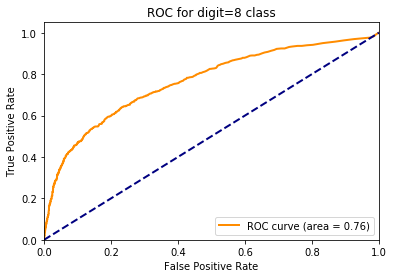

Epoch 1/5, training loss: 1.521756471814336, validation loss: 1.7946858406066895
[[ 957    1   22    0]
 [   1 1130    4    0]
 [   0    0    0    0]
 [ 510   14  450    0]]
	     precision: 0.4071
	        recall: 0.4907
	            F1: 0.4394
	      accuracy: 0.6651


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


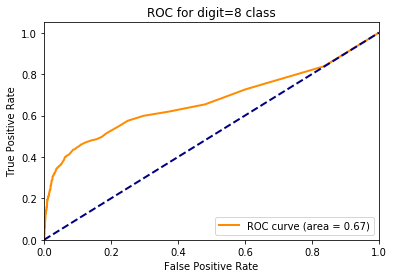

Epoch 2/5, training loss: 1.46625130079888, validation loss: 1.783043384552002
[[ 978    1    1    0]
 [   0 1135    0    0]
 [   0    0    0    0]
 [ 913   31   30    0]]
	     precision: 0.3899
	        recall: 0.5252
	            F1: 0.4362
	      accuracy: 0.6772


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


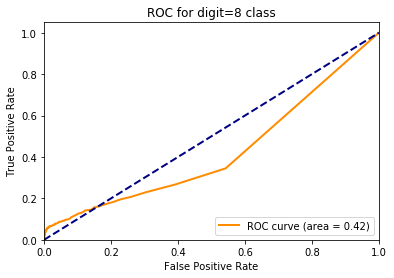

Epoch 3/5, training loss: 1.4637976272686108, validation loss: 1.7846335172653198
[[ 979    0    1    0]
 [   3 1132    0    0]
 [   0    0    0    0]
 [ 960    7    7    0]]
	     precision: 0.4398
	        recall: 0.5888
	            F1: 0.4888
	      accuracy: 0.6766


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


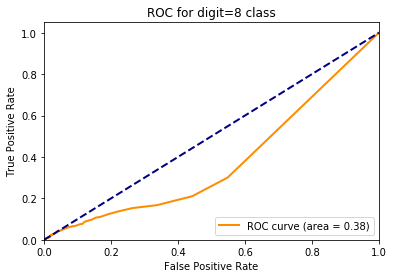

Epoch 4/5, training loss: 1.4627950159279075, validation loss: 1.7828081846237183
[[ 976    0    4    0]
 [   2 1127    6    0]
 [   0    0    0    0]
 [ 799    0  175    0]]
	     precision: 0.3972
	        recall: 0.5102
	            F1: 0.4369
	      accuracy: 0.6784


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


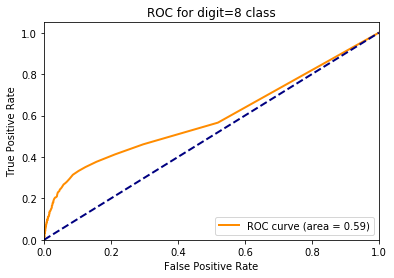

Epoch 5/5, training loss: 1.4624657469826776, validation loss: 1.771106243133545
[[ 978    0    2    0]
 [   0 1133    2    0]
 [   0    0    0    0]
 [ 884    6   84    0]]
	     precision: 0.3917
	        recall: 0.5119
	            F1: 0.4335
	      accuracy: 0.6892
[1.521756471814336, 1.46625130079888, 1.4637976272686108, 1.4627950159279075, 1.4624657469826776]
Training time: 435.0052800178528s


In [0]:
start_ts = time.time()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
epochs = 5

model = MnistResNet().to(device)
train_loader, val_loader = get_data_loaders(256, 256)


losses = []
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adadelta(model.parameters())

batches = len(train_loader)
val_batches = len(val_loader)

# training loop + eval loop
for epoch in range(epochs):
    total_loss = 0
    progress = tqdm(enumerate(train_loader), desc="Loss: ", total=batches)
    model.train()
    
    for i, data in progress:
        X, y = data[0].to(device), data[1].to(device)
        
        model.zero_grad()
        outputs = model(X)
        loss = loss_function(outputs, y)

        loss.backward()
        optimizer.step()
        current_loss = loss.item()
        total_loss += current_loss
        progress.set_description("Loss: {:.4f}".format(total_loss/(i+1)))
        
    torch.cuda.empty_cache()
    
    val_losses = 0
    precision, recall, f1, accuracy = [], [], [], []
    
    confusion_actuals = []
    probabilities = []
    predictions = []
    roc_actuals = []

    which_class = 8

    model.eval()
    with torch.no_grad():
        for i, data in enumerate(val_loader):
            X, y = data[0].to(device), data[1].to(device)
            outputs = model(X)
            prediction = outputs.argmax(dim=1, keepdim=True)
            confusion_actuals.extend(y.view_as(prediction))
            roc_actuals.extend(y.view_as(prediction) == which_class)
            probabilities.extend(np.exp(outputs.cpu()[:, which_class]))  
            predictions.extend(prediction)

            val_losses += loss_function(outputs, y)

            predicted_classes = torch.max(outputs, 1)[1]
            
            for acc, metric in zip((precision, recall, f1, accuracy), 
                                   (precision_score, recall_score, f1_score, accuracy_score)):
                acc.append(
                    calculate_metric(metric, y.cpu(), predicted_classes.cpu())
                )
    confusion_actuals = [i.item() for i in confusion_actuals]
    predictions = [i.item() for i in predictions]
    roc_actuals = [i.item() for i in roc_actuals]
    class_probabilities = [i.item() for i in probabilities]


    fpr, tpr, _ = roc_curve(roc_actuals, class_probabilities)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2 
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for digit=%d class' % which_class)
    plt.legend(loc="lower right")
    plt.show()
        
    print(f"Epoch {epoch+1}/{epochs}, training loss: {total_loss/batches}, validation loss: {val_losses/val_batches}")
    print(confusion_matrix(confusion_actuals, predictions))    
    print_scores(precision, recall, f1, accuracy, val_batches)
    losses.append(total_loss/batches)
print(losses)
print(f"Training time: {time.time()-start_ts}s")
